<a href="https://colab.research.google.com/github/Shadi-Aldbaiss/Data-Preprocessing/blob/main/DataPreprocessing_Imbalance_Insurance_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Library :**

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Read dataset**

In [65]:
# Import the dataset
df = pd.read_csv('/content/aug_train.csv')
df_test = pd.read_csv('/content/aug_test.csv')

# **Discovering dataset**

In [66]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [67]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0
382153,401019,Female,29,1,18.0,1,< 1 Year,No,30396.0,152.0,104,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [69]:
print("Number of rows in Training set is = ", df.shape[0], " \nNumber of columns in Training set is = " , df.shape[1])
print('-----------------------------------------------')
print("Number of rows in Test set is = ", df_test.shape[0], " \nNumber of columns in Test set is = " , df_test.shape[1])

Number of rows in Training set is =  382154  
Number of columns in Training set is =  12
-----------------------------------------------
Number of rows in Test set is =  78273  
Number of columns in Test set is =  11


In [70]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000,382154.000000
mean,234392.953477,38.545691,0.998108,26.406867,0.489182,30711.271362,111.939812,154.189429,0.163811
std,139527.487326,15.226897,0.043455,13.181241,0.499884,17061.595532,54.286511,83.735107,0.370104
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,115006.250000,25.000000,1.000000,15.000000,0.000000,24546.000000,26.000000,81.000000,0.000000
50%,230461.500000,36.000000,1.000000,28.000000,0.000000,31692.000000,145.000000,154.000000,0.000000
75%,345434.750000,49.000000,1.000000,35.000000,1.000000,39447.750000,152.000000,227.000000,0.000000
max,508145.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [71]:
# Check for missing values in each column
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


In [72]:
# List all categorical columns and their unique values
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Vehicle_Age: ['< 1 Year' '1-2 Year' '> 2 Years']
Vehicle_Damage: ['No' 'Yes']


# **EDA**

## **UNIVARIATE ANALYSIS**

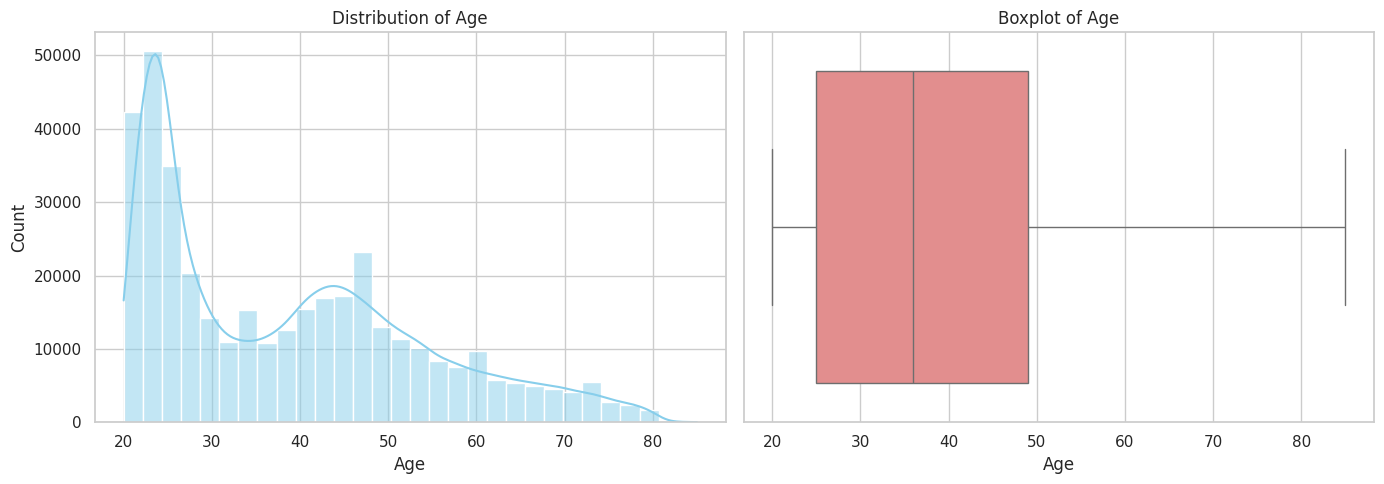

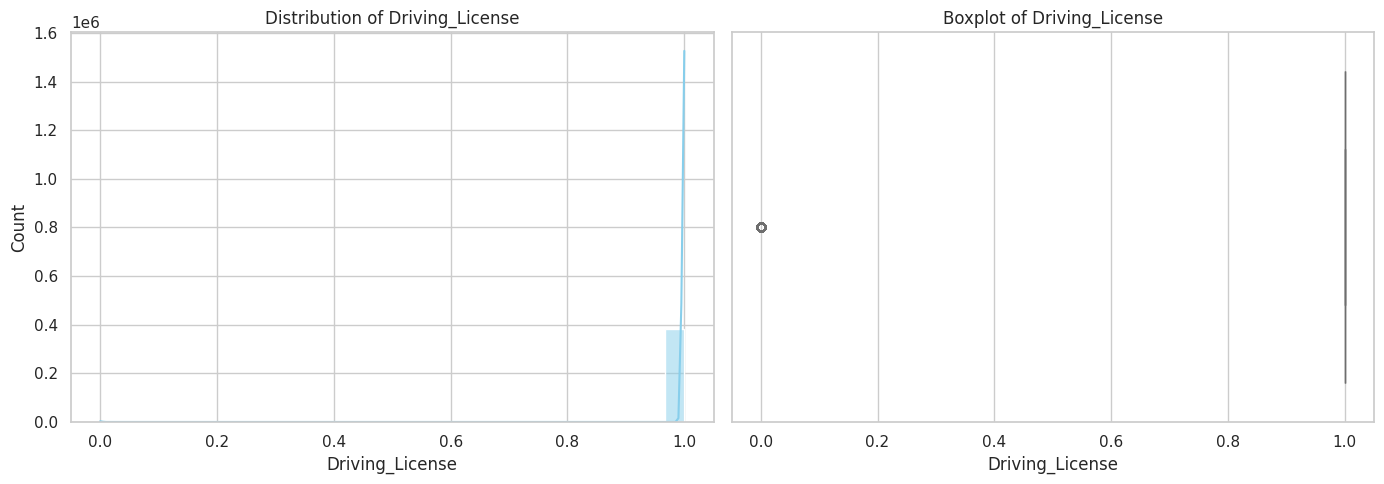

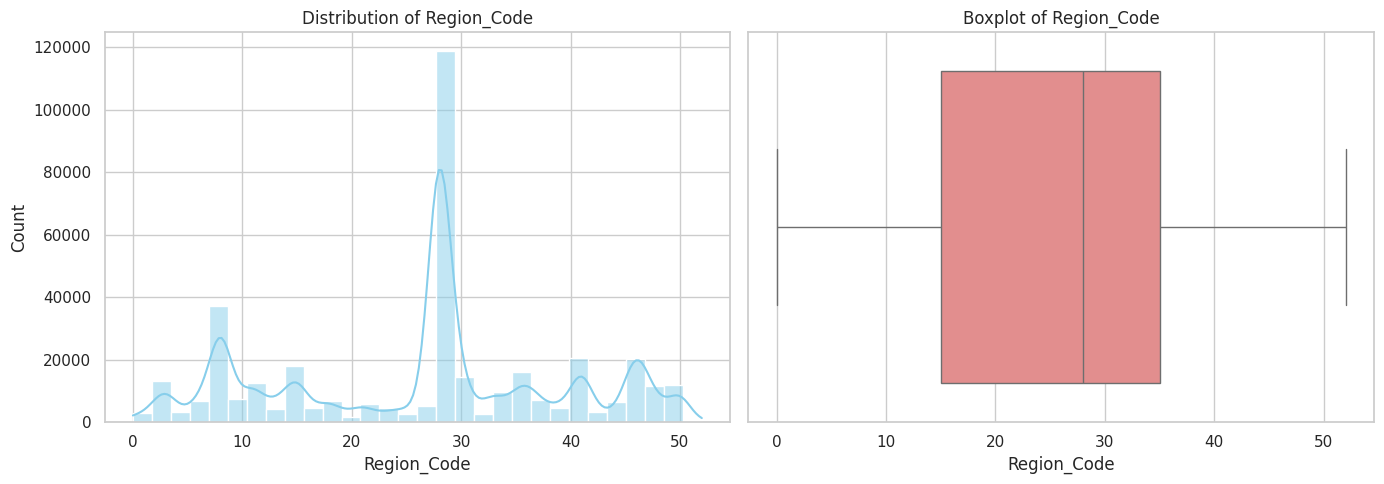

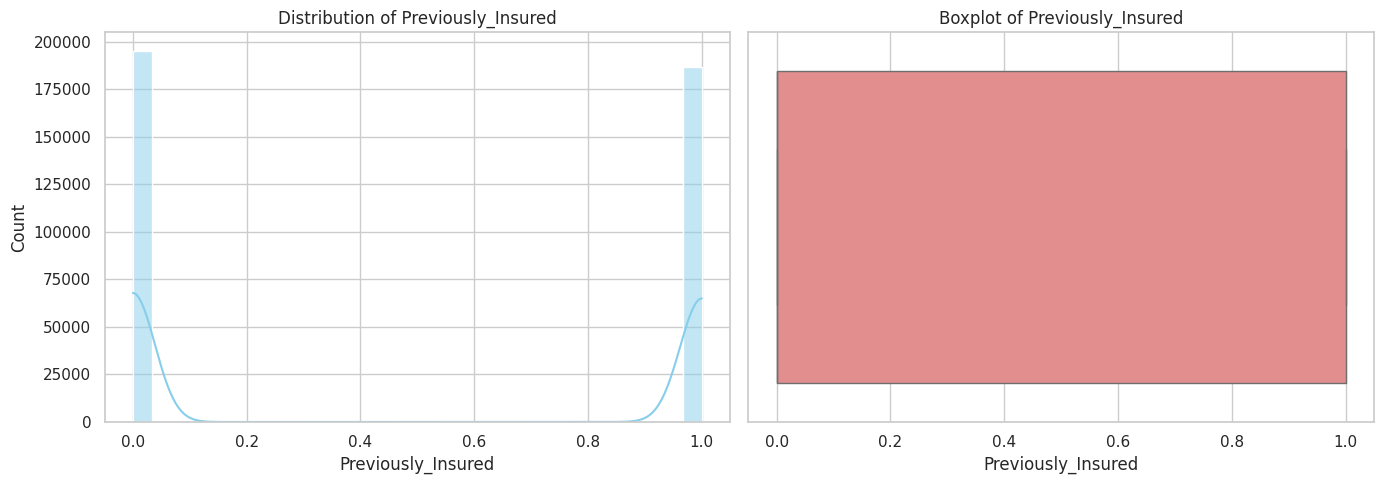

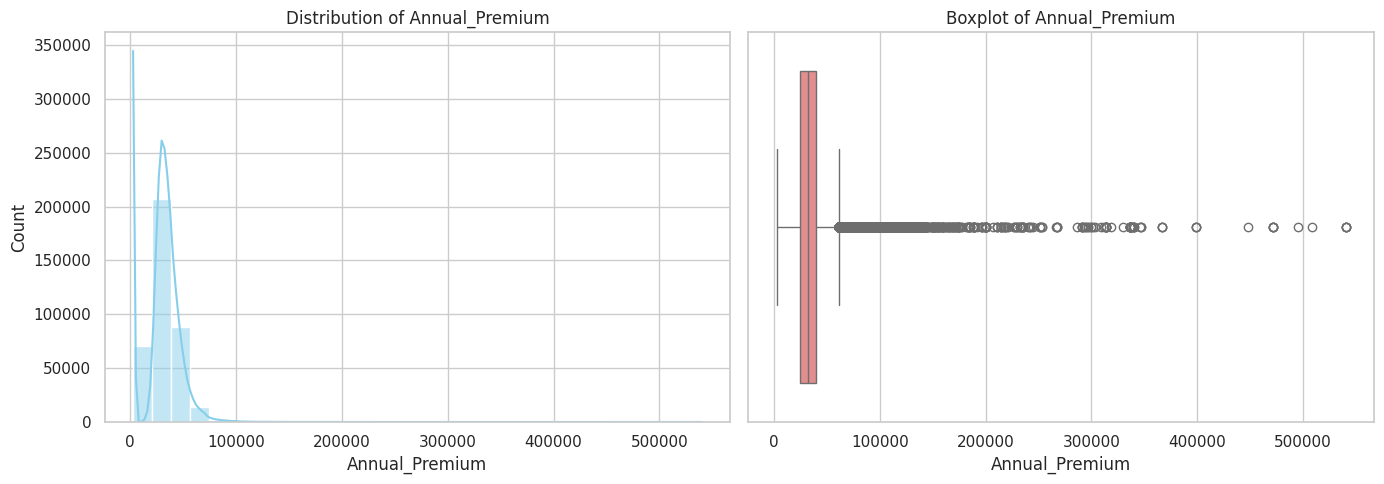

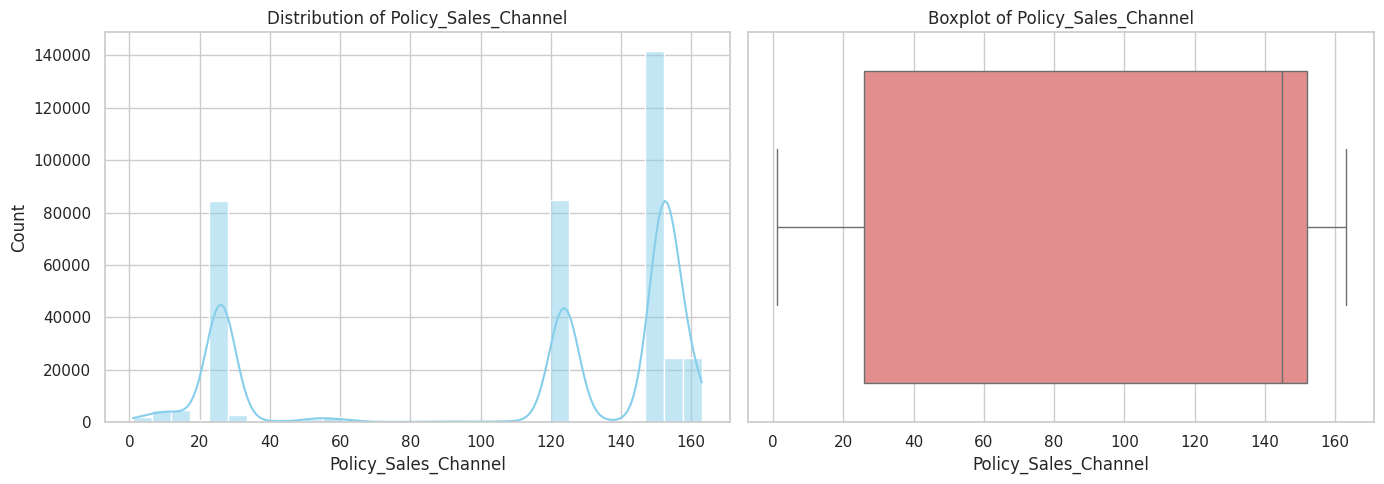

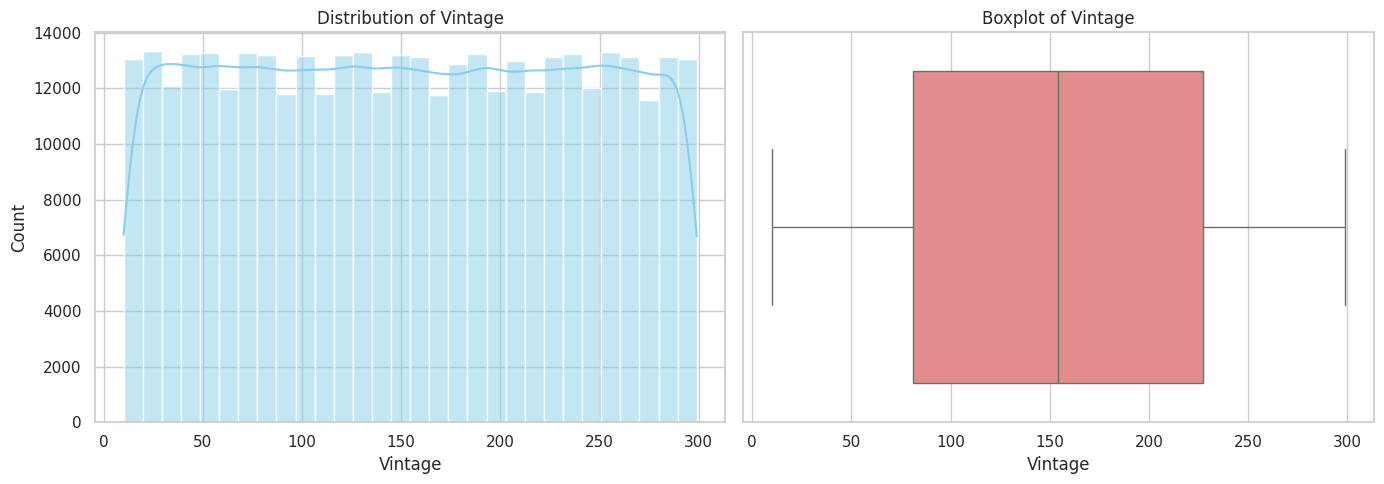

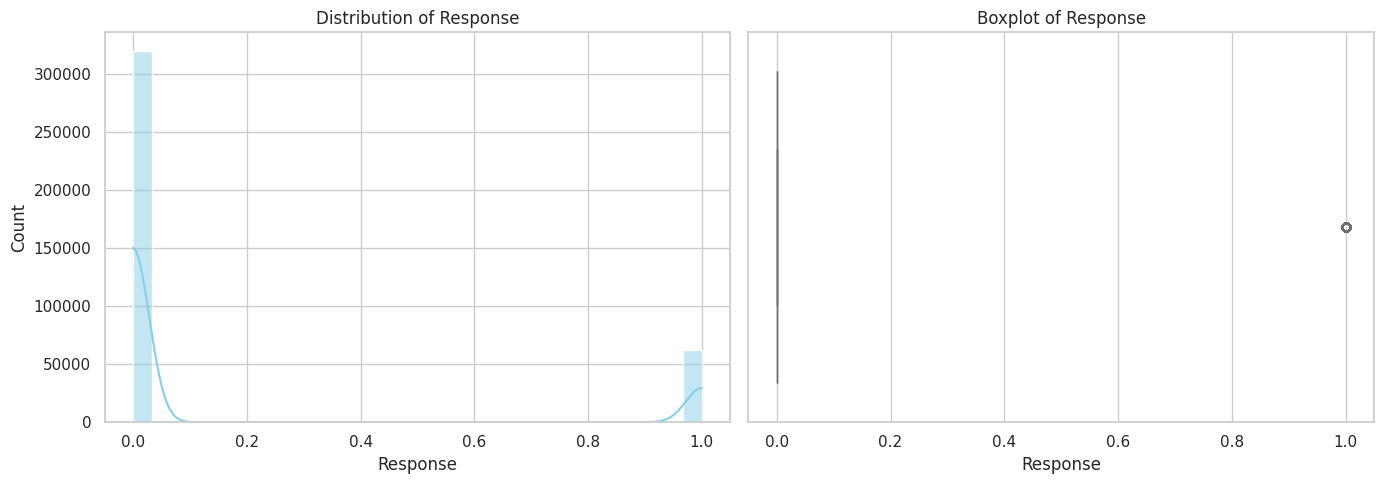

In [73]:
# Set the style
sns.set(style="whitegrid")

# Numerical columns
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium','Policy_Sales_Channel','Vintage','Response']

# Loop through numerical columns
for col in numerical_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

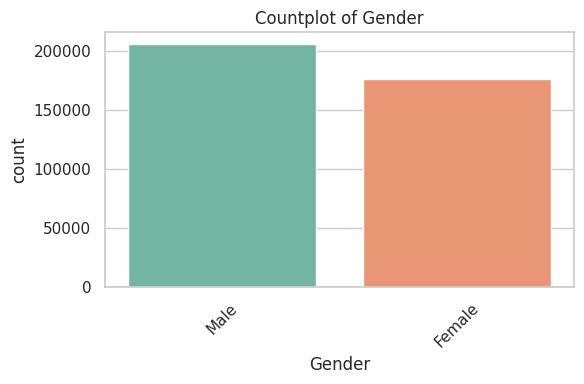

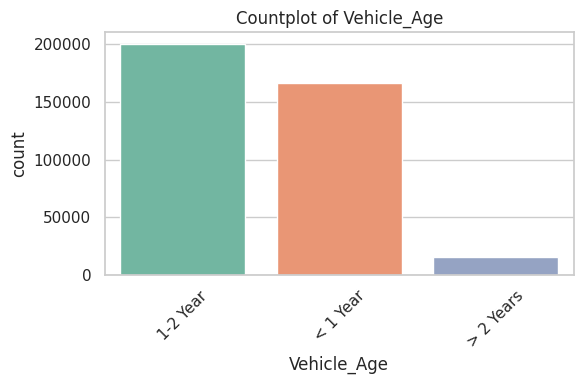

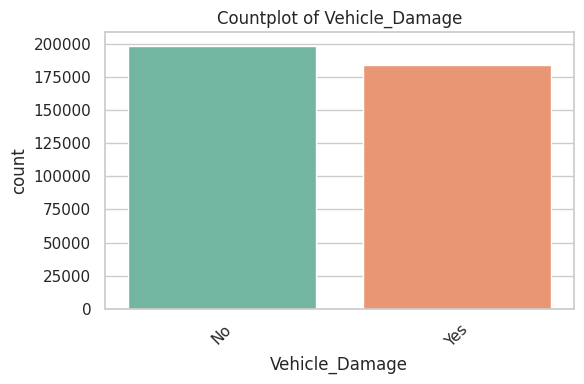

In [74]:
# Categorical columns
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

# Plot countplots
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='Set2')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **Bivariate Analysis**

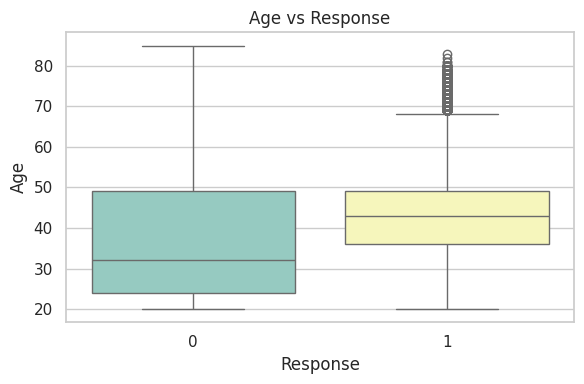

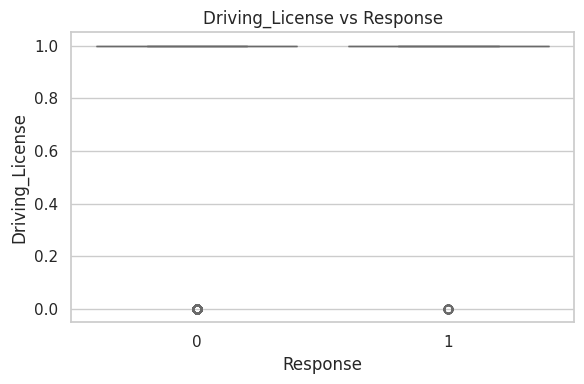

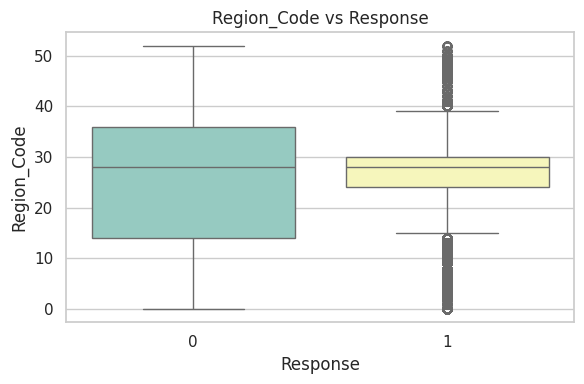

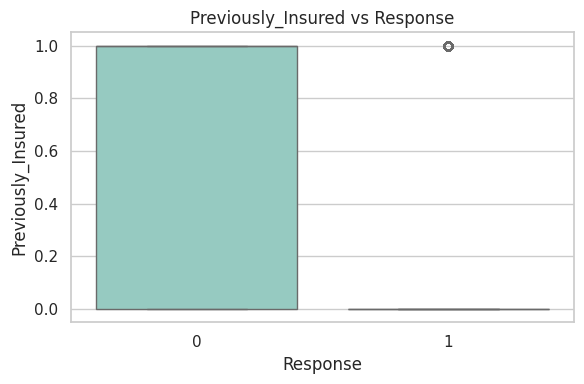

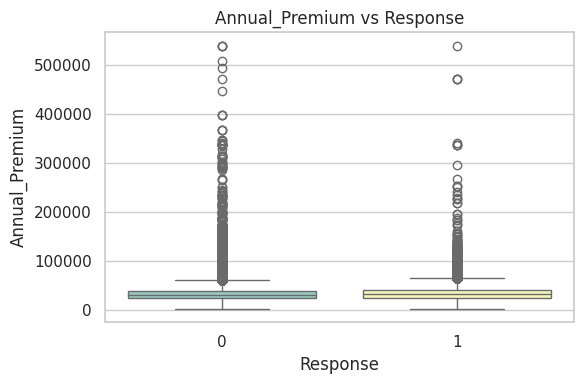

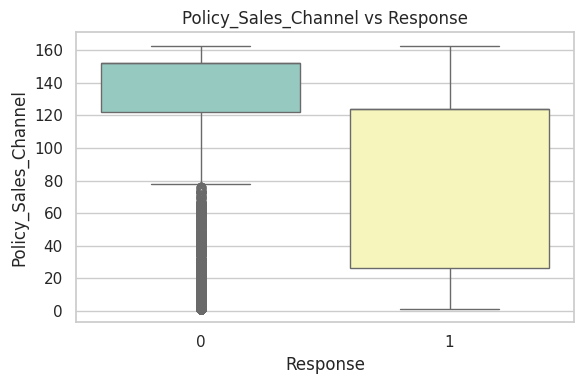

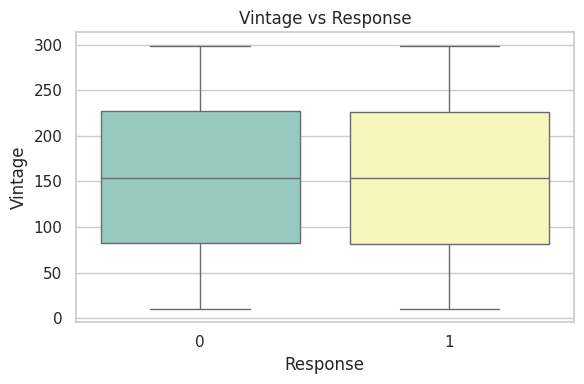

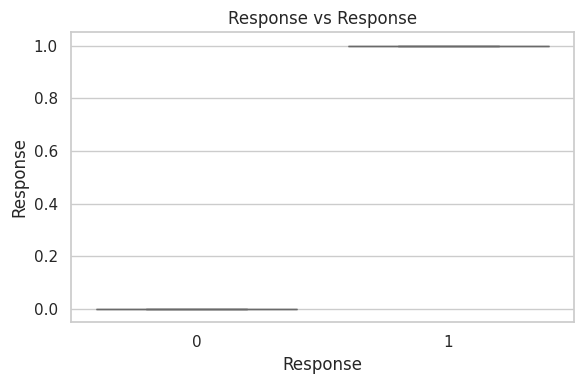

In [75]:
# List of numerical columns
numerical_cols = ['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium','Policy_Sales_Channel','Vintage','Response']

# Boxplots for numerical columns vs target
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Response', y=col, data=df, palette='Set3')
    plt.title(f'{col} vs Response')
    plt.tight_layout()
    plt.show()

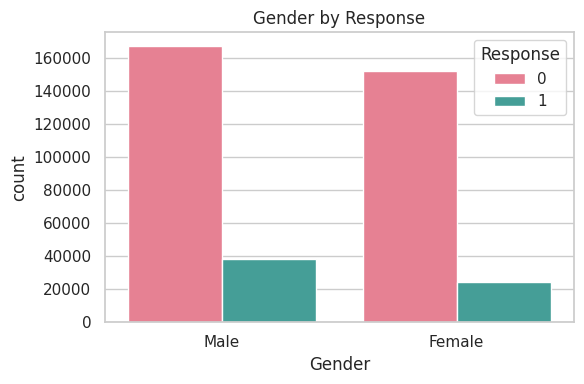

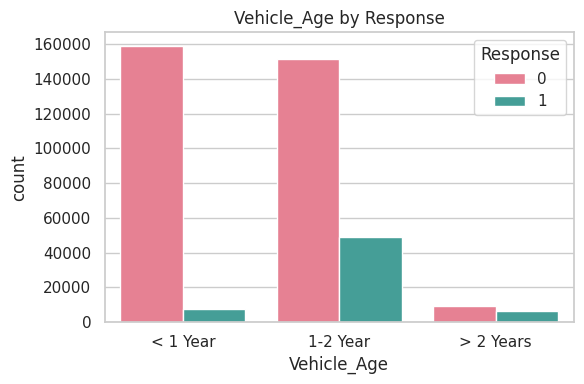

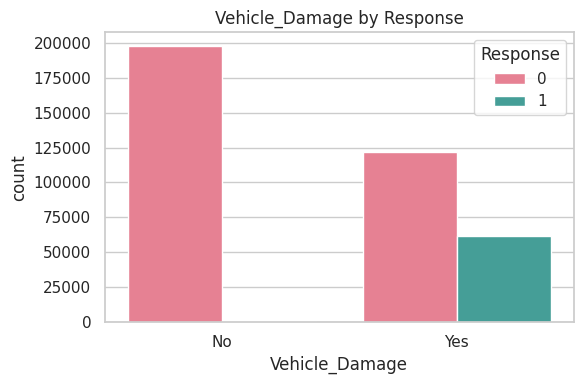

In [76]:
# Categorical columns
categorical_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']

# Countplots by Response
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Response', palette='husl')
    plt.title(f'{col} by Response')
    plt.tight_layout()
    plt.show()

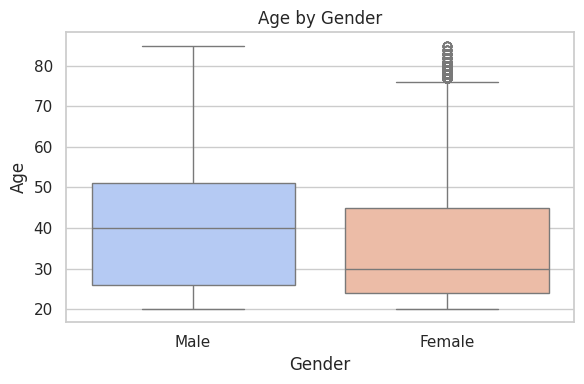

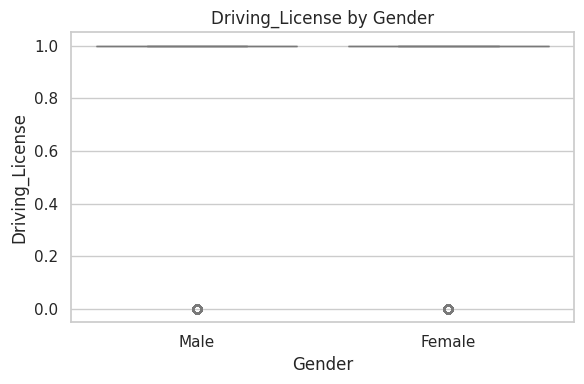

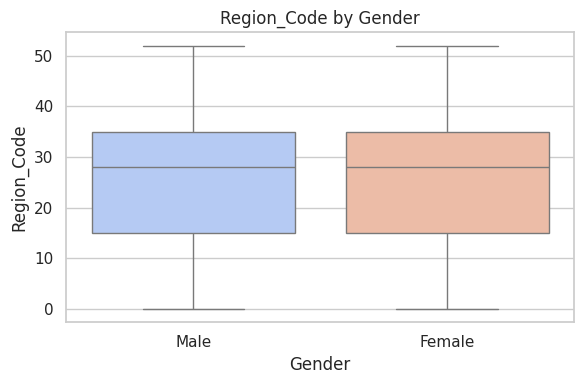

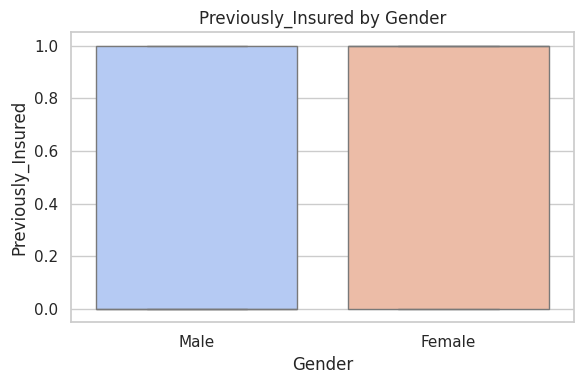

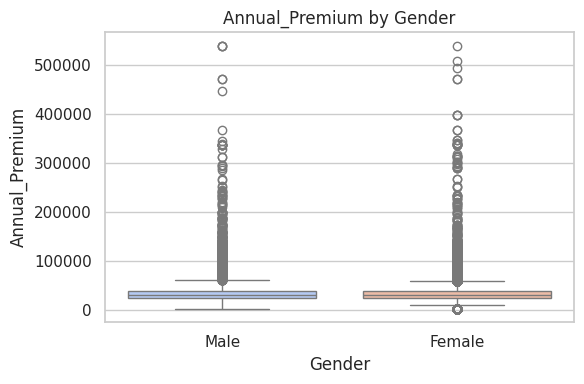

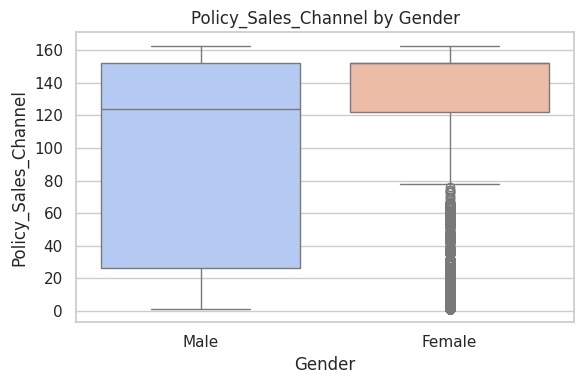

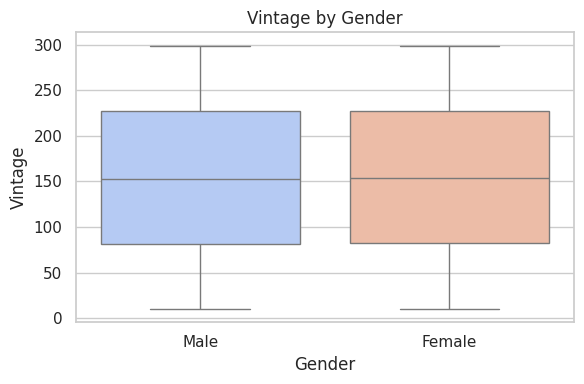

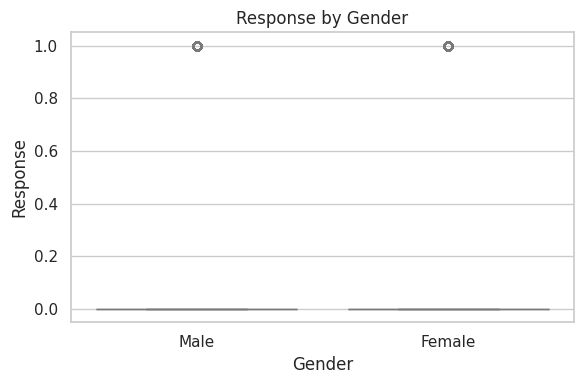

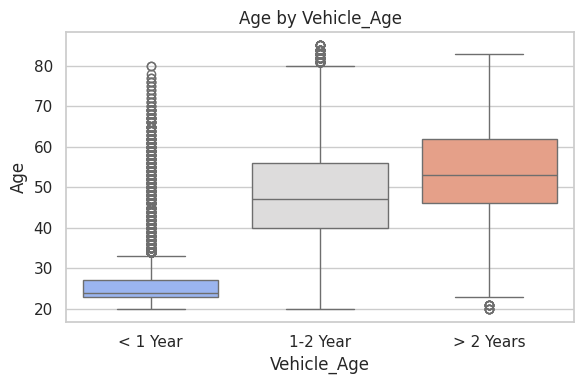

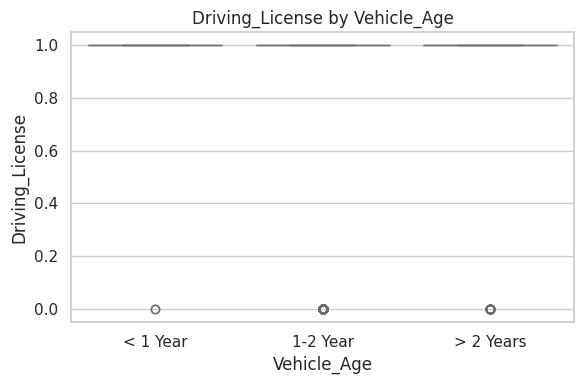

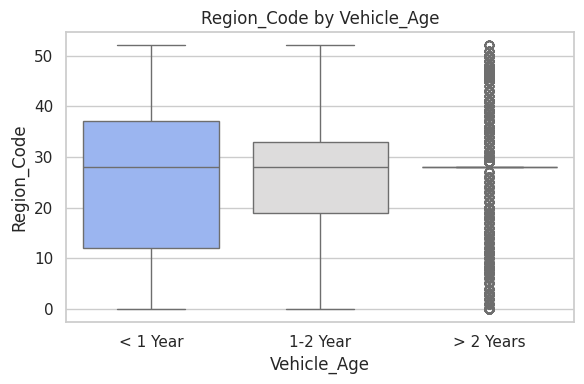

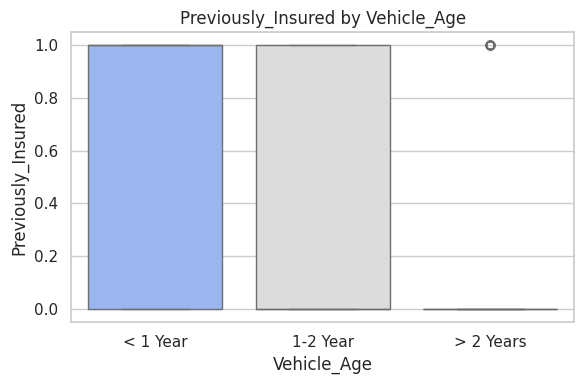

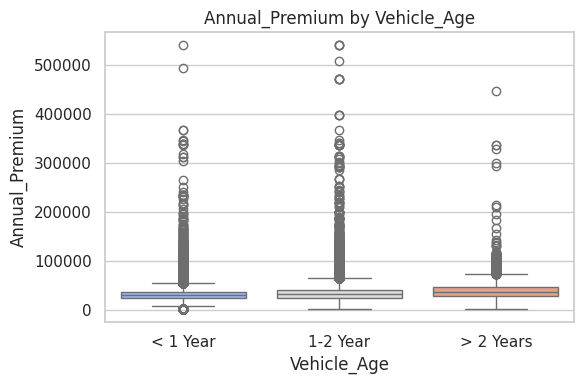

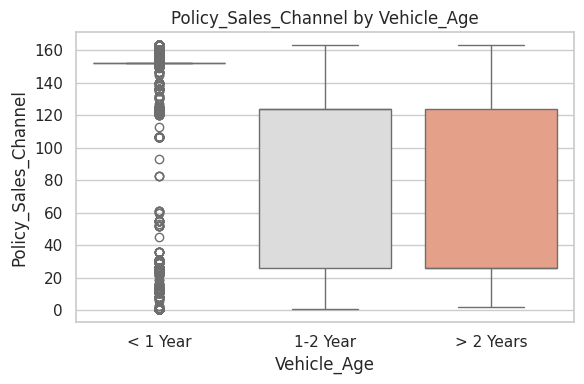

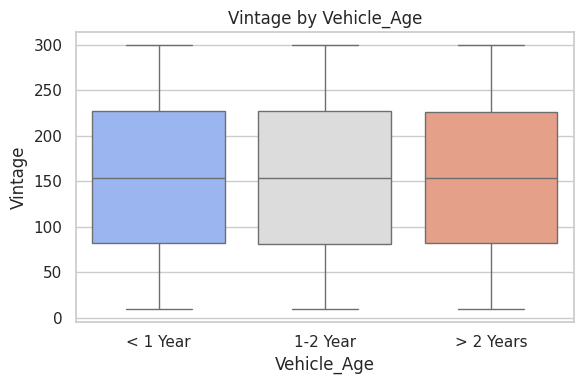

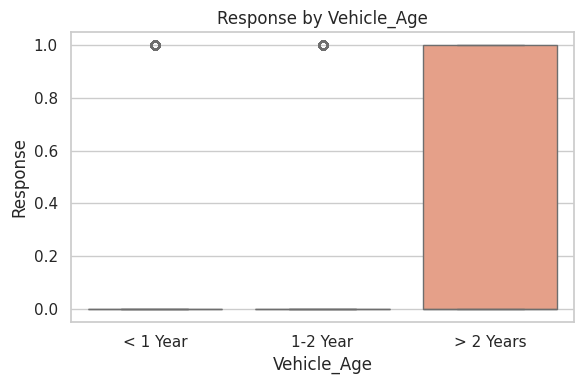

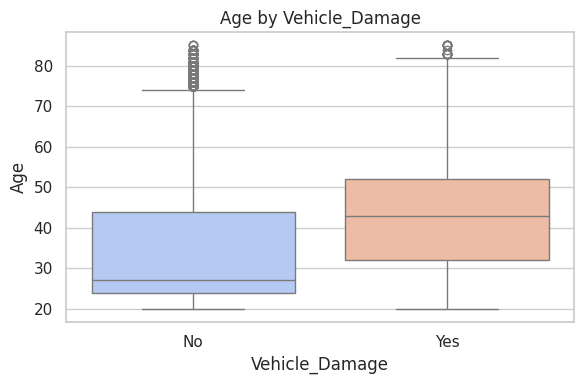

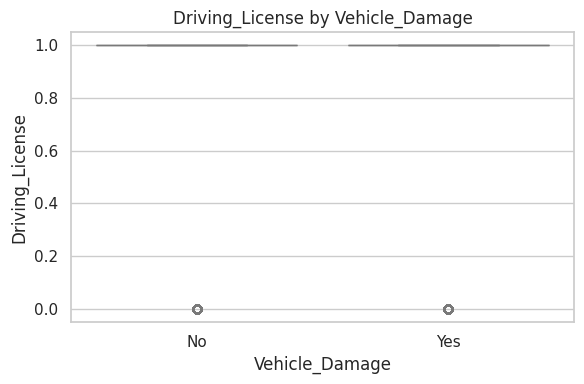

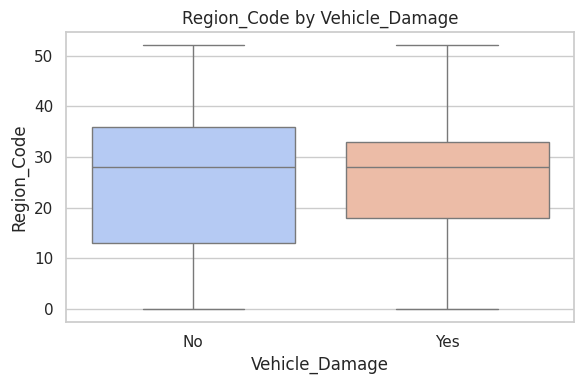

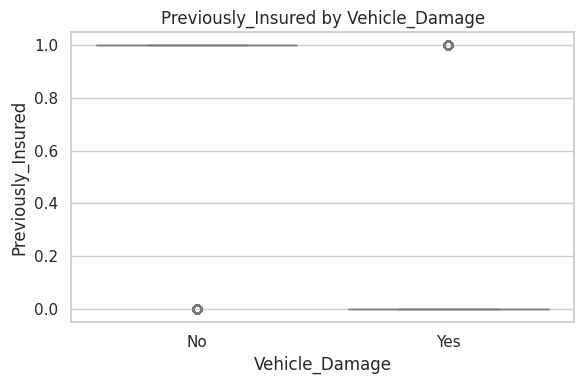

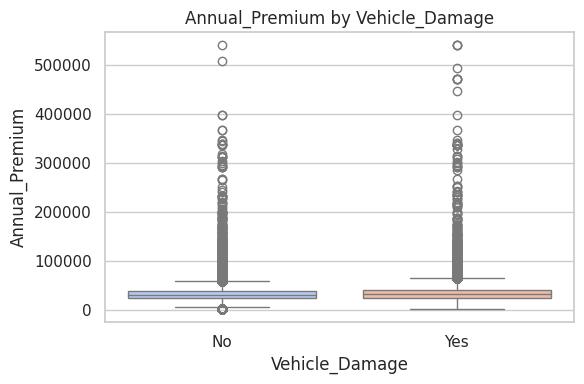

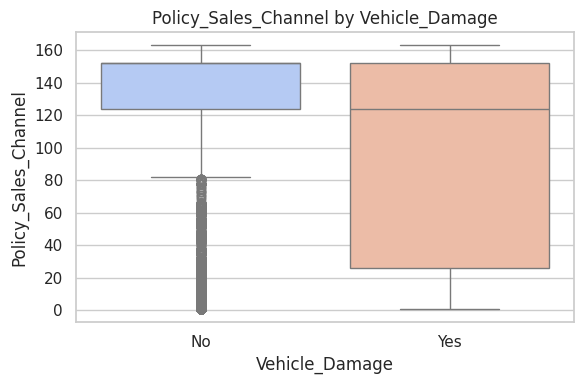

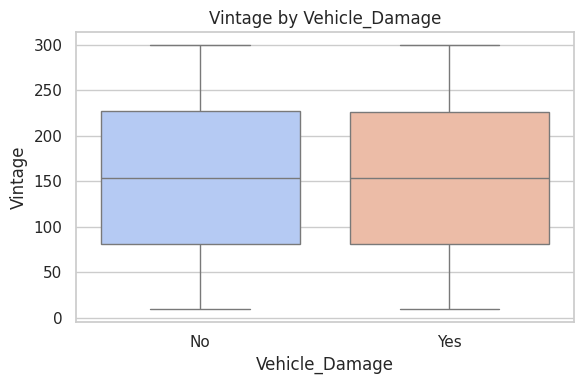

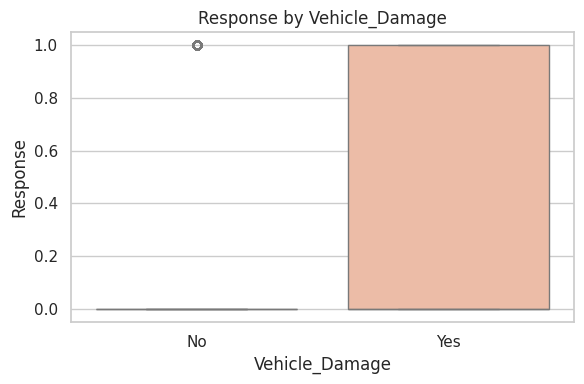

In [77]:
# Loop through combinations of numerical and categorical columns
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=cat_col, y=num_col, data=df, palette='coolwarm')
        plt.title(f'{num_col} by {cat_col}')
        plt.tight_layout()
        plt.show()

## **Multivariate analysis**

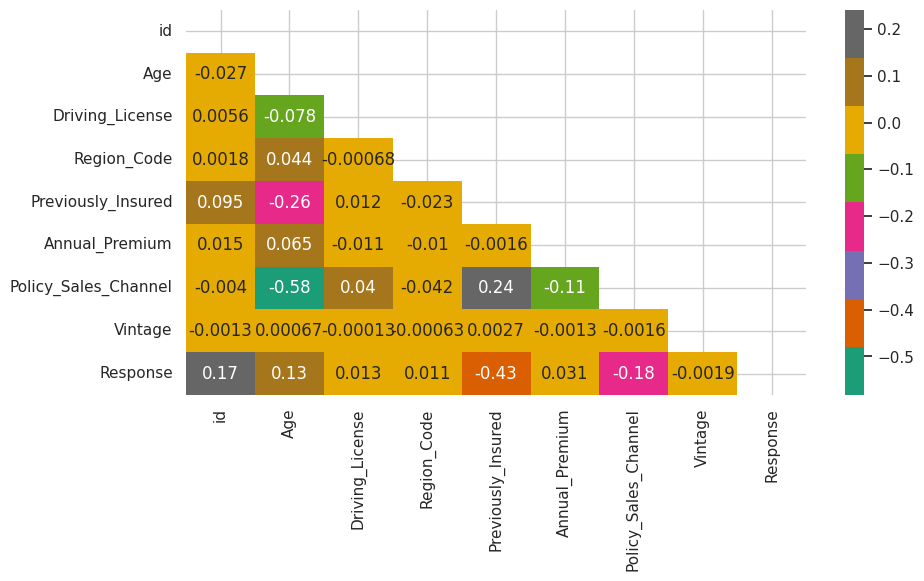

In [78]:
# Correlation heatmap
df_num_col = df.select_dtypes(exclude=['object']).columns
df_num = df[df_num_col]
plt.figure(figsize=(10,5))
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask = mask, annot=True, cmap='Dark2');

In [79]:
correlation = (pd.DataFrame(df_num.corr().Response))
correlation.sort_values(by='Response', ascending=False).style.background_gradient(cmap='coolwarm_r')

,Response
Response,1.000000
id,0.166621
Age,0.133149
Annual_Premium,0.030777
Driving_License,0.013250
Region_Code,0.011289
Vintage,-0.001884
Policy_Sales_Channel,-0.184514
Previously_Insured,-0.431224


In [80]:
df.drop('id',axis=1,inplace=True)

In [81]:
df['Response'].value_counts()

,count
Response,
0,319553
1,62601


In [82]:
#Count of Class zero
Response_0 =len(df[df["Response"]==0])
Response_0

319553

In [83]:
#Count of Class One
Response_1 =len(df[df["Response"]==1])
Response_1

62601

In [84]:
Total = len(df['Response'])

In [85]:
Percentage_Response_Zero = Response_0/Total
print("Percentage of Response_Zero is    : ",Percentage_Response_Zero*100)
Percentage_Response_One = Response_1/Total
print("Percentage of Response_One is    : ",Percentage_Response_One*100)

Percentage of Response_Zero is    :  83.61890756082626
Percentage of Response_One is    :  16.381092439173734


Text(0.5, 1.0, 'Class Distributions \n (0  || 1)')

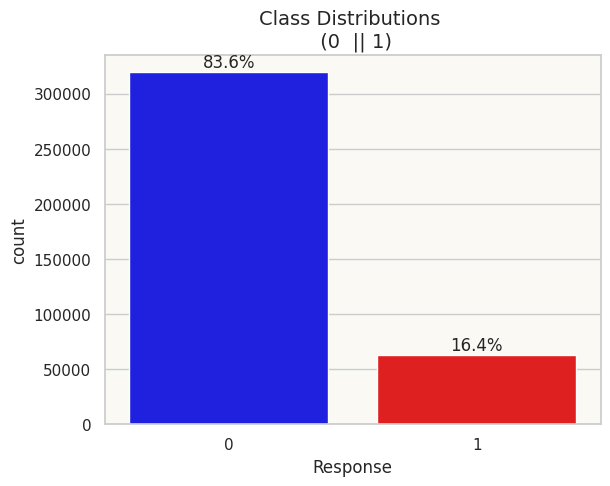

In [86]:
colors = ["blue", "red"]


ax = sns.countplot(x ='Response', data=df, palette=colors)
ax.set_facecolor('#faf9f4')
for p in ax.patches:
    percentage = f'{100 * p.get_height() / Total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()

    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Class Distributions \n (0  || 1)', fontsize=14)

# **Statistical Analysis of Numerical Columns**

In [87]:
df_num_col = df.select_dtypes(exclude=['object']).columns
df_num = df[df_num_col]
df_num.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,22,1,7.0,1,2630.0,152.0,16,0
1,42,1,28.0,0,43327.0,26.0,135,0
2,66,1,33.0,0,35841.0,124.0,253,0
3,22,1,33.0,0,27645.0,152.0,69,0
4,28,1,46.0,1,29023.0,152.0,211,0


In [88]:
df_num.describe().T.style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
Age,382154.000000,38.545691,15.226897,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,382154.000000,0.998108,0.043455,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,382154.000000,26.406867,13.181241,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,382154.000000,0.489182,0.499884,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,382154.000000,30711.271362,17061.595532,2630.000000,24546.000000,31692.000000,39447.750000,540165.000000
Policy_Sales_Channel,382154.000000,111.939812,54.286511,1.000000,26.000000,145.000000,152.000000,163.000000
Vintage,382154.000000,154.189429,83.735107,10.000000,81.000000,154.000000,227.000000,299.000000
Response,382154.000000,0.163811,0.370104,0.000000,0.000000,0.000000,0.000000,1.000000


# **Data Preprocessing**

## **Handle Missing Values**

In [89]:
df.isnull().sum().sum()

np.int64(0)

In [90]:
df_test.isnull().sum().sum()

np.int64(0)

## **Class Imbalance**

In [91]:
#Encoding Categorical Features
X = df.drop(['Response'],axis = 1)
y = df['Response']

In [92]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,22,1,7.0,1,2630.0,152.0,16,True,True,False,False
1,42,1,28.0,0,43327.0,26.0,135,True,False,False,True
2,66,1,33.0,0,35841.0,124.0,253,False,False,False,True
3,22,1,33.0,0,27645.0,152.0,69,False,True,False,False
4,28,1,46.0,1,29023.0,152.0,211,True,True,False,False


In [93]:
#Splitting data set to training and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
#Feature Scaling
cols = X_train.columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

In [95]:
#Random Sampling
#1.Oversample minority class
train_data=pd.concat([X_train,y_train],axis=1)

Response_Zero=train_data[train_data.Response==0]
Response_One=train_data[train_data.Response==1]

In [96]:
upsampled_One = resample(Response_One,
                          replace=True, # sample with replacement
                          n_samples=len(Response_Zero), # match number in majority class
                          random_state=27) # reproducible results

In [97]:
# combine majority and upsampled minority
upsampled = pd.concat([Response_Zero, upsampled_One])

In [98]:
y_train.value_counts()

,count
Response,
0,223800
1,43707


In [99]:
upsampled['Response'].value_counts()

,count
Response,
0.0,223800
1.0,223800


Text(0, 0.5, 'count')

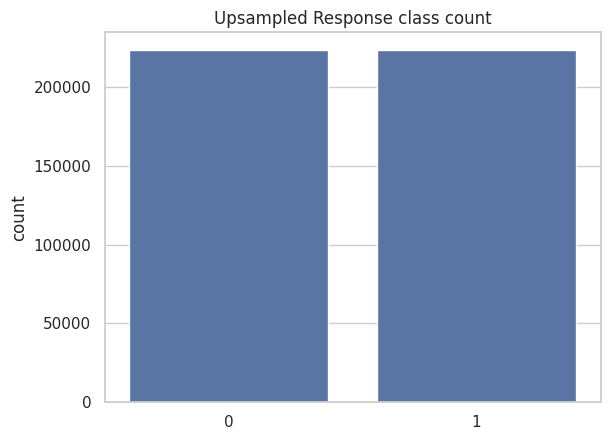

In [100]:
#Visualisation of Target of Oversampled minority class
y1=upsampled.Response.value_counts()
sns.barplot(y=y1,x=[0,1])
plt.title('Upsampled Response class count')
plt.ylabel('count')

In [101]:
#2. Undersample majority class
df['Response'].value_counts()

,count
Response,
0,319553
1,62601


In [102]:
downsampled_Zero = resample(Response_Zero,
                                replace = False, # sample without replacement
                                n_samples = len(Response_One), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([downsampled_Zero, Response_One])

In [103]:
downsampled['Response'].value_counts()

,count
Response,
0.0,43707
1.0,43707


Text(0, 0.5, 'count')

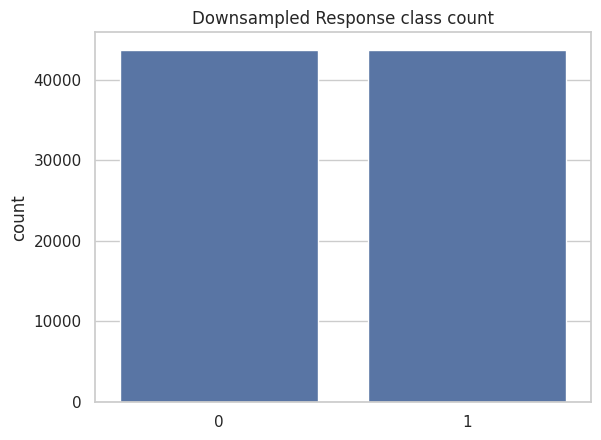

In [104]:
y2=downsampled.Response.value_counts()
sns.barplot(y=y2,x=[0,1])
plt.title('Downsampled Response class count')
plt.ylabel('count')